In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import re

In [2]:
df = pd.read_csv("data_raw/full_post_list.csv", index_col=0)
sort = df[["verdict", "title"]].groupby("verdict").count()
sort = sort.sort_values(by=["title"], ascending=False).reset_index()
sort = sort[sort["title"] > 2]
print(sort["verdict"].tolist())

['Not the A-hole', 'Asshole', 'No A-holes here', 'Everyone Sucks', 'not the a-hole', 'Not enough info', 'asshole', 'Update', 'META', 'UPDATE', 'no a--holes here', 'everyone sucks', 'Shitpost']


In [3]:
def pp_mapverdict(df):
    df = pd.read_csv("data_raw/full_post_list.csv", index_col=0)
    df["target"] = df["verdict"].map(
        lambda y: "NTA"
        if y in ["Not the A-hole", "not the a-hole"]
        else "YTA"
        if y in ["Asshole", "asshole"]
        else "NAH"
        if y in ["No A-holes here", "no a--holes here"]
        else "ESH"
        if y in ["Everyone Sucks", "everyone sucks"]
        else "n/a"
    )
    df = df[df["target"] != "n/a"]
    return df

df = pp_mapverdict(df)
df[["target", "title"]].groupby("target").count()

,title
target,
ESH,881
NAH,1697
NTA,10490
YTA,3439


In [4]:
def pp_minbodylength(df):
    length_body = []
    for text in df["body"]:
        length = len(str(text))
        length_body.append(length)
    df["length_body"] = length_body
    df = df[(df["length_body"] >= 15) & (df["length_body"] <= 3500)]
    return df

df = pp_minbodylength(df)
df.sort_values(by=["length_body"]).head()

,title,id,score,num_comments,body,date,verdict,target,length_body
17930,AITA For being upset because my wife won’t let...,b9xb5n,178,143,Basically title. \n\n,2019-04-05 22:03:48,Not the A-hole,NTA,19
19881,AITA for photoshopping the hair of one of my w...,awzuvd,319,250,Over 600 pics...it was fun. 🤦🏻‍♂️,2019-03-03 23:07:32,Not the A-hole,NTA,33
18625,WIBTA for taking a family members child to get...,b5oau9,224,180,Throw away account for obvious reasons \n\n,2019-03-26 11:03:17,Everyone Sucks,ESH,41
20896,AITA for not answering my phone to numbers I d...,8nszxn,128,47,I refuse to call back if they don't leave a me...,2018-06-01 15:55:15,not the a-hole,NTA,98
19332,AITA for wanting to order delivery in a blizzard,b11xp9,81,94,"I didn't, but only because my friends convince...",2019-03-14 15:51:55,Not the A-hole,NTA,113


In [5]:
def pp_titlecheck(df):
    type_list = []
    for aita in df["title"]:
        title_aita = list(aita.split(" "))[0]
        title_aita = (" ".join(re.findall("[a-zA-Z]+", title_aita))).lower()

        aita_check = bool(re.match(title_aita, "aita"))
        wibta_check = bool(re.match(title_aita, "wibta"))

        if aita_check:
            type_list.append("AITA")
        elif wibta_check:
            type_list.append("WIBTA")
        else:
            type_list.append("n/a")

    df["title_aita"] = type_list
    df = df[df["title_aita"] != "n/a"]
    return df

df = pp_titlecheck(df)
df[["title_aita", "title"]].groupby("title_aita").count()

,title
title_aita,
AITA,13878
WIBTA,2512


In [6]:
df2 = df.copy()

def density_plot_var_target(variables, target, df2):
    count = 0
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
    for variable in variables:
        if variable != "length_body":
            df2[variable] = np.log(df2[variable])
        for name in list(df2[target].unique()):
            g=sns.kdeplot(
                df2[variable][(df2[target] == name)],
                legend=True,
                shade=True,
                ax=ax[count]
            )
        if variable != "length_body":
            g.title.set_text(("log %s"%variable))
        else:
            g.title.set_text(variable)
        g.set_xlim(left=0)
        g.legend(list(df2[target].unique()))
        count += 1

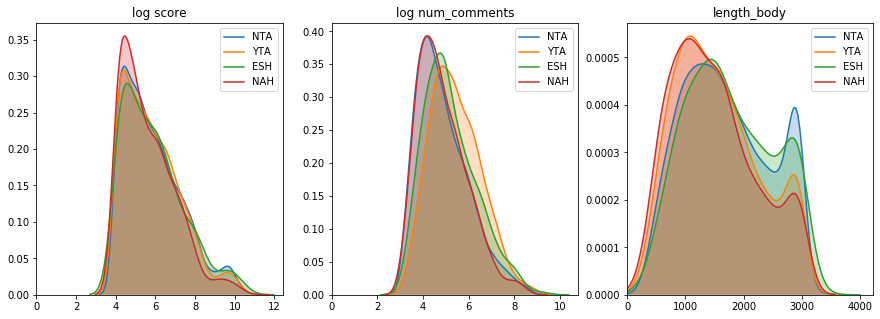

In [7]:
density_plot_var_target(["score", "num_comments", "length_body"], "target", df2)

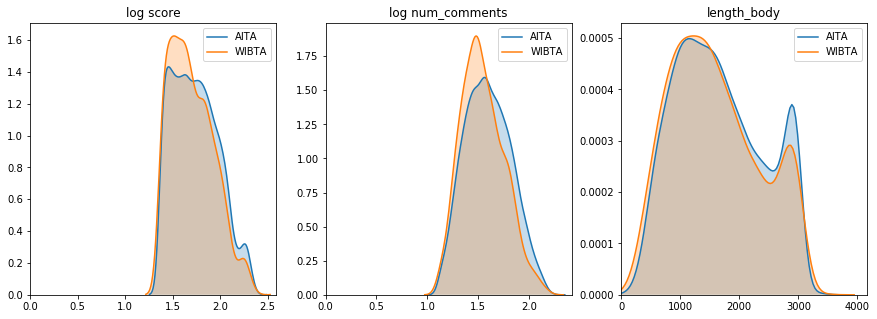

In [8]:
density_plot_var_target(["score", "num_comments", "length_body"], "title_aita", df2)

In [9]:
aita = pd.read_csv("data_raw/full_post_list.csv", index_col=0)

def pp_analysis(df):
    df = pp_mapverdict(df)
    df = pp_minbodylength(df)
    df = pp_titlecheck(df)
    df = df.reset_index(drop=True)
    return df

aita = pp_analysis(aita)
print(aita.shape)
aita.to_csv("data_output/aita_full_processed.csv")
aita.head()

(16390, 10)


,title,id,score,num_comments,body,date,verdict,target,length_body,title_aita
0,AITA for calling my ex out on his fb post?,freddt,118,1542,"So little baby ""*J*"" was born 16/5/17, his dad...",2020-03-29 22:08:12,Not the A-hole,NTA,1515,AITA
1,AITA for uninviting my brother from my wedding...,evcp7o,65,1406,"Hi everyone, I'm using a throwaway, and I just...",2020-01-28 22:17:02,Not the A-hole,NTA,2476,AITA
2,AITA for finally poking back at my childfree s...,evbyg8,131,1844,"My wife's sister Abby is ""childfree."" Neither...",2020-01-28 21:28:47,Not the A-hole,NTA,1711,AITA
3,"AItA for refusing my MIL's offer of ""free"" chi...",ekc023,76,2387,Throwaway due to the specificity of the detail...,2020-01-05 11:41:55,Not the A-hole,NTA,1184,AITA
4,AITA MIL tried to have my baby blessed without...,ek8tg4,98,483,My MIL and FIL are first time grandparents who...,2020-01-05 05:40:01,Not the A-hole,NTA,2272,AITA


In [10]:
def pp_for_model(df):
    df["binary_target"] = df["target"].map(
        lambda y: 1
        if y in ["ESH", "YTA"]
        else 0
        if y in ["NAH", "NTA"]
        else "n/a"
    )
    df = df[["target", "binary_target", "title", "body"]]
    return df

df = pp_for_model(df)
df[["binary_target", "title"]].groupby("binary_target").count()

,title
binary_target,
0,12098
1,4292


In [11]:
aita = pd.read_csv("data_raw/full_post_list.csv", index_col=0)

def pp_analysis(df):
    df = pp_mapverdict(df)
    df = pp_minbodylength(df)
    df = pp_titlecheck(df)
    df = pp_for_model(df)
    df = df.reset_index(drop=True)
    return df

aita = pp_analysis(aita)
print(aita.shape)
aita.to_csv("data_output/aita_xy_processed.csv")
aita.head()

(16390, 4)


,target,binary_target,title,body
0,NTA,0,AITA for calling my ex out on his fb post?,"So little baby ""*J*"" was born 16/5/17, his dad..."
1,NTA,0,AITA for uninviting my brother from my wedding...,"Hi everyone, I'm using a throwaway, and I just..."
2,NTA,0,AITA for finally poking back at my childfree s...,"My wife's sister Abby is ""childfree."" Neither..."
3,NTA,0,"AItA for refusing my MIL's offer of ""free"" chi...",Throwaway due to the specificity of the detail...
4,NTA,0,AITA MIL tried to have my baby blessed without...,My MIL and FIL are first time grandparents who...
